<a href="https://colab.research.google.com/github/GeoLabUniLaSalle/Python/blob/main/Labyrinthe_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Labyrinthe - Génération**

Nous souhaitons construire un labyrinthe aléatoire.

Commençons par importer les modules nécessaires.

In [4]:
import random as rd
import matplotlib.pyplot as plt
import time
from IPython import display

En cas d'erreur sur ce bloc d'instructions, lancez l'installation des modules matplotlib et networkx, redémarrez le noyau, puis re-exécutez la dernière cellule de code.

In [ ]:
import sys  
!{sys.executable} -m pip install --user matplotlib
!{sys.executable} -m pip install --user random
!{sys.executable} -m pip install --user time
!{sys.executable} -m pip install --user IPython

Créons maintenant notre propre labyrinthe, en utilisant :
*   Une fonction **voisins** qui retourne la liste des cases voisines d'une case passée en paramètre
*   Une liste **labyrinthe** pour stocker les chemins qui composent le labyrinthe. Une case contenant un 0 est un mur et une case contenant un 1 est un chemin
*   Un dictionnaire **parcours** qui associe des cases voisines reliées par un chemin sous la forme (x1,y1):(x2,y2) : la case de coordonnées (x1,y1) est reliée à la case de coordonnées (x2,y2) par un chemin

Nous utiliserons le parcours en profondeur **DFS** pour construire les associations entre deux cases stockées dans **parcours**.



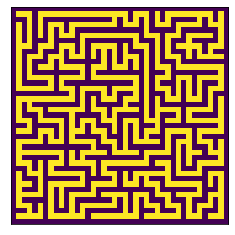

In [5]:
# Dimensions du labyrinthe
LARGEUR = 20
HAUTEUR = 20

def voisins(couple):
  """
  Renvoie la liste des cellules voisines
  de la cellule 'couple'
  """
  listeVoisins = []
  i, j = couple
  for d in (-1, 1):
    if -1 < i+d < HAUTEUR:
      listeVoisins.append((i+d, j))
    if   -1 < j+d < LARGEUR:
      listeVoisins.append((i, j+d))
  return listeVoisins

def dfs(s) :
  P={s:None}
  Q=[s]
  while Q:
    u=Q[-1]
    R=[y for y in voisins(u) if y not in P]
    if R :
      v=rd.choice(R) # Tire un élément au hasard parmi R (parmi les voisins possibles)
      P[v]=u
      Q.append(v)
    else :
      Q.pop()
  return P

def generer():
  labyrinthe = [[0] * (2*LARGEUR+1) for i in range(2*HAUTEUR+1)] # Initialisation du labyrinthe avec des 0 dans toutes les cases
  parcours = dfs((0,0)) # Initialisation de parcours avec les couples de cases reliées par un chemin

  for i,j in parcours:
    labyrinthe[2*i+1][2*j+1] = 1 # On crée un chemin sur toutes les cases du labyrinthe
    if (i,j)!=(0,0):
      k,l = parcours[(i,j)]
      labyrinthe[i+k+1][j+l+1] = 1 # Quand deux cases sont reliées, on crée un chemin reliant ces cases

  plt.imshow(labyrinthe) # Affichage du labyrinthe sous la forme d'une image
  plt.xticks([])
  plt.yticks([])
  plt.show()

generer()

# **Parcours**

Affichons le parcours de ce labyrinthe avec un parcours en profondeur **DFS**.


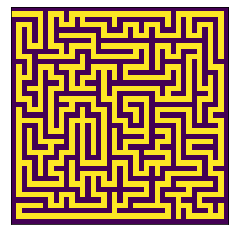

In [12]:
def generer2():
  labyrinthe = [[0] * (2*LARGEUR+1) for i in range(2*HAUTEUR+1)]
  parcours = dfs((0,0))
  for i,j in parcours:
    labyrinthe[2*i+1][2*j+1] = 1
    if (i,j)!=(0,0):
      k,l = parcours[(i,j)]
      labyrinthe[i+k+1][j+l+1] = 1
  return labyrinthe, parcours

def maj(labyrinthe,parcours,u):
  i,j = u
  labyrinthe[2*i+1][2*j+1] = 2
  if u!=(0,0):
    k,l = parcours[u]
    labyrinthe[i+k+1][j+l+1] = 2
  return labyrinthe

def affiche(f,l):
  f.set_data(l)
  display.display(plt.gcf())
  display.clear_output(wait=True)
  time.sleep(0.05)

l, p = generer2()
l[1][0] = 2
f = plt.imshow(l)
plt.xticks([])
plt.yticks([])
for u in p:
  l = maj(l,p,u)
  affiche(f,l)

Voyons enfin le parcours de ce labyrinthe avec un parcours en largeur **BFS**.


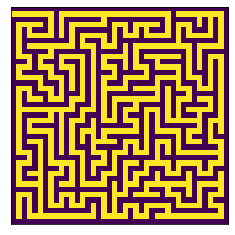

In [13]:
def bfs(G, S, f, labyrinthe):
  P = {S : None}
  Q = [S]
  while Q:
    u = Q.pop(0)
    i,j = u
    labyrinthe[2*i+1][2*j+1] = 2
    for v in G[u]:
      if v in P:
        continue
      P[v] = u
      Q.append(v)
      k,l = v
      labyrinthe[i+k+1][j+l+1] = 2
    affiche(f,labyrinthe)

def graphe(l):
  G = dict()
  for i in range(HAUTEUR):
    for j in range(LARGEUR):
      v=voisins((i,j))
      val = []
      for k in v:
        a,b = k
        if l[i+a+1][j+b+1] == 1:
          val.append((a,b))
      G[(i,j)]=val
  return G

l, p = generer2()
l[1][0] = 2
D = graphe(l)
f = plt.imshow(l)
plt.xticks([])
plt.yticks([])
bfs(D,(0,0),f,l)

Le parcours en largeur (**BFS**) permet de connaitre le plus court chemin entre deux sommets, contrairement au partours en profondeur (**DFS**).

Dans le cas où on cherche à savoir si deux sommets sont reliés par un chemin, les deux solutions présentent leurs avantages.

Si le sommet à atteindre est proche du sommet source, **BFS** sera souvent plus efficace que **DFS**. A l'inverse, si le sommet à atteindre est éloigné du sommet source, **DFS** sera souvent plus efficace que **BFS**.

# **Exercice**

A partir du labyrinthe généré ce-dessus, affichez s'il existe un chemin reliant deux points A et B de coordonnées aléatoires, avec un parcours en largeur (**BFS**) et avec un parcours en profondeur(**DFS**).

In [ ]:
def cheminBFS(l,debut,fin):
  # A compléter

A = # A compléter
B = # A compléter
c chemincheminBFS(l,A,B):
if c:
  print("Il existe un chemin reliant les sommets",A,"et",B)
else:
  print("Il n'existe pas de chemin reliant les sommets",A,"et",B)

In [ ]:
def cheminDFS(l,debut,fin):
  # A compléter

A = # A compléter
B = # A compléter
c chemincheminBFS(l,A,B):
if c:
  print("Il existe un chemin reliant les sommets",A,"et",B)
else:
  print("Il n'existe pas de chemin reliant les sommets",A,"et",B)

Affichez visuellement les chemins parcourus par cheminBFS et cheminDFS pour déterminer si les sommets sont reliés.

In [ ]:
def cheminBFS2(l,debut,fin):
  # A compléter

A = # A compléter
B = # A compléter
c chemincheminBFS(l,A,B):
if c:
  print("Il existe un chemin reliant les sommets",A,"et",B)
else:
  print("Il n'existe pas de chemin reliant les sommets",A,"et",B)

In [ ]:
def cheminDFS(l,debut,fin):
  # A compléter

A = # A compléter
B = # A compléter
c chemincheminBFS(l,A,B):
if c:
  print("Il existe un chemin reliant les sommets",A,"et",B)
else:
  print("Il n'existe pas de chemin reliant les sommets",A,"et",B)